In [5]:
import numpy as np
import matplotlib.pyplot as plt

Question 1:

In this first question, I'm going to characterize quite a few 2-dimensional systems of differential equations.

The first system up is
$$ \dot x = 5x + 10y\\
  \dot y = x - y $$

The nullclines of this system are the solutions to $\dot x = 0$ and $\dot y = 0$, respectively.

Therefore, the nullclines are
$$ \dot x = 0 \implies 0 = 5x + 10y \implies -5x = 10y \implies -\frac{1}{2}x = y\\
\dot y = 0 \implies 0 = x - y \implies y = x$$

By graphing the nullclines and noting their intersection, we can find where both $\dot x = 0$ and $\dot y = 0$: those points will be the fixed points of the system.

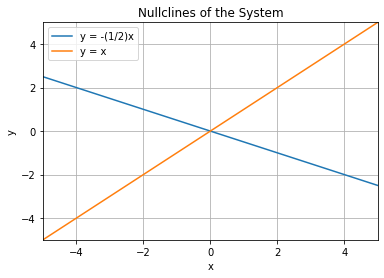

In [56]:
def plotNullclines(xLabel,xNull,yLabel,yNull,xValsPlotted, limits = [-10,10]):
    nullX = [xNull(x) for x in xValsPlotted]
    nullFigX = plt.plot(xValsPlotted,nullX,label=xLabel)

    nullY = [yNull(x) for x in xValsPlotted]
    nullFigY = plt.plot(xValsPlotted,nullY,label=yLabel)

    origin = plt.plot(np.zeros(np.arange(1000).size),np.zeros(np.arange(1000).size),color="black")

    plt.title("Nullclines of the System")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(limits)
    plt.ylim(limits)
    plt.grid(True)
    plt.legend()
    plt.show()

xNull = lambda x: -(1/2)*x
yNull = lambda x: x
xValsPlotted = 0.01*np.arange(1000) - 5
plotNullclines("y = -(1/2)x",xNull,"y = x",yNull,xValsPlotted,limits=[-5,5])

Since the fixed points of the system are given by the intersection of the nullclines, we see that the fixed point of the system is $(0,0)$, which makes sense in the light of the system's governing equations.

Now, to ascertain the stability of $(0,0)$, we look at the eigenvalues of the system's Jacobian at $(0,0)$.

Taking the system to be
$$\dot x = f(x,y)\\
\dot y = g(x,y)$$

the Jacobian Matrix for the system is

$$\begin{bmatrix}
    \frac{\partial f}{\partial x}(x,y) & \frac{\partial f}{\partial y}(x,y)\\
    \frac{\partial g}{\partial x}(x,y) & \frac{\partial g}{\partial y}(x,y)
  \end{bmatrix} =
  \begin{bmatrix}
    5 & 10\\
    1 & -1
  \end{bmatrix}
$$

Thus, we can look at the characteristic equation for this matrix:

$$(5-\lambda)(-1 - \lambda) - 10 = 0 \implies \lambda^2 - 4\lambda - 5 - 10 = 0$$

Applying the quadratic formula, we get that
$$ \lambda = 2 + \sqrt{19}; 2 - \sqrt{19}$$

Therefore, since one eigenvalue is of positive value and one eigenvalue is of negative value, the fixed point is a saddle point, stable along one line and unstable along the others.

Here's some trajectories plotted in the vicinity of $(0,0)$.

In [74]:
def plotSystem2DE(xString,xDot,yString,yDot,initCondition, plotScalingFactor = 1, iters = 1000, dt = 0.001):
    x = np.zeros(np.arange(iters).size)
    y = np.zeros(np.arange(iters).size)

    x[0] = initCondition[0]
    y[0] = initCondition[1]
    
    #So that we automatically skip over i = 0
    for i in np.arange(iters-1)+1:
        x[i] = x[i-1] + xDot(x[i-1],y[i-1])*dt
        y[i] = y[i-1] + yDot(x[i-1],y[i-1])*dt
    
    systemPlt = plt.plot(x,y,label="Trajectory")
    plt.title("{}, {} starting at ({},{})".format(xString,yString,initCondition[0],initCondition[1]))
    plt.plot(x[0],y[0],color = 'green',marker = '.',label="Initial Condition",markersize = 15)
    plt.plot(x[-1],y[-1],color = 'black',marker = '.',label="Final State",markersize = 15)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim([-100*plotScalingFactor,100*plotScalingFactor])
    plt.ylim([-100*plotScalingFactor,100*plotScalingFactor])
    plt.grid(True)
    plt.legend()
    plt.show()

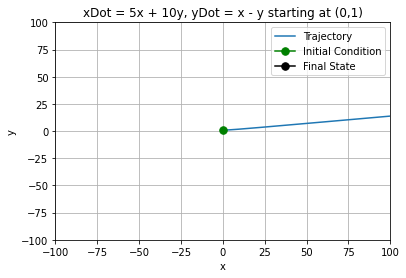

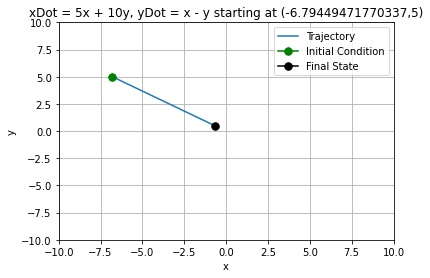

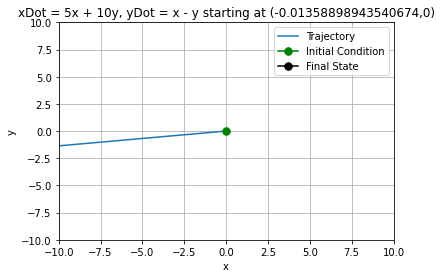

In [75]:
xDot = lambda x,y: 5*x + 10*y
yDot = lambda x,y: x - y
plotSystem2DE("xDot = 5x + 10y",xDot,"yDot = x - y",yDot,[0,1])
plotSystem2DE("xDot = 5x + 10y",xDot,"yDot = x - y",yDot,[5*(3-np.sqrt(19)),5*1],0.1)
plotSystem2DE("xDot = 5x + 10y",xDot,"yDot = x - y",yDot,[0.01*(3-np.sqrt(19)),0],0.1,10000)

While this system of differential equations doesn't give a whole of crazy behavior, one can see that, even when the initial condition is close to the fixed point at $(0,0)$, most directions give divergent trajectories. However, along the line

$$ (3-\sqrt{19},1)t $$

the system does converge: this is because this line is the span of the eigenvector corresponding to the eigenvalue

$$ \lambda = 2 -\sqrt{19}$$

which is the only eigenvalue with a negative value. So only along that direction which has no contribution from the positive eigenvalue do trajectories converge.

Let's move on to the next system:

$$\dot x = xy - 1\\
\dot y = x - y^3$$

The nullclines, where $\dot x = 0$ and $\dot y = 0$ respectively, are given by

$$ xy - 1 = 0 \implies xy = 1 \implies y = \frac{1}{x}$$
$$x - y^3 = 0 \implies x = y^3$$

the top nullcline being valid only when $x \neq 0$ and $y \neq 0$.
Let's plot these and look at their intersection.

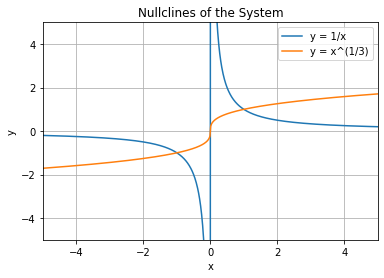

In [57]:
xVals = 0.01*np.arange(10000) - 10
xValsPlotted = xVals[np.where(xVals!=0)]
xNull = lambda x: (1/x)
yNull = lambda x: np.cbrt(x)

plotNullclines("y = 1/x",xNull,"y = x^(1/3)",yNull,xValsPlotted,limits = [-5,5])

By looking at the plot, we can see that the intersections of the nullclines are right around $(-1,-1)$ and $(1,1)$, which make sense since

$$ x^{\frac{1}{3}} = \frac{1}{x} \implies x = \frac{1}{x^3} \implies x^4 = 1 \implies x = -1, 1$$

Then, when $x = -1$, $y = \frac{1}{-1} = -1$ and $y = (-1)^{\frac{1}{3}} = -1$. Similarly, when $x = 1$, $y = \frac{1}{1} = 1$ and $y = (1)^{\frac{1}{3}} = 1$. So we can guarantee these are indeed the intersections of the nullclines.

Thus, $(-1,-1)$ and $(1,1)$ are the fixed points of the system.

The Jacobian Matrix for this system is
$$\begin{bmatrix}
    \frac{\partial f}{\partial x}(x,y) & \frac{\partial f}{\partial y}(x,y)\\
    \frac{\partial g}{\partial x}(x,y) & \frac{\partial g}{\partial y}(x,y)
  \end{bmatrix} =
  \begin{bmatrix}
    y & x\\
    1 & -3y^2
  \end{bmatrix}
$$

Therefore, the Jacobian at $(1,1)$ is

$$\begin{bmatrix}
    y & x\\
    1 & -3y^2
  \end{bmatrix} =
  \begin{bmatrix}
    1 & 1\\
    1 & -3
  \end{bmatrix}
$$

Also, the Jacobian at $(-1,-1)$ is

$$\begin{bmatrix}
    y & x\\
    1 & -3y^2
  \end{bmatrix} =
  \begin{bmatrix}
    -1 & -1\\
    1 & -3
  \end{bmatrix}
$$

We can compute the eigenvalues and associated eigenvectors to these Jacobians using NumPy's eig() function.

In [69]:
J = lambda x,y: np.array([[y,x],[1,-3*(y**2)]])

eigenStuff11 = np.linalg.eig(J(1,1))
eigenvalues11 = eigenStuff11[0]
eigenvectors11 = eigenStuff11[1]

eigenStuffNeg11 = np.linalg.eig(J(-1,-1))
eigenvaluesNeg11 = eigenStuffNeg11[0]
eigenvectorsNeg11 = eigenStuffNeg11[1]

print("Eigenvalues of Jacobian at (1,1): {},{}\n".format(eigenvalues11[0],eigenvalues11[1]))
print("Eigenvectors of Jacobian at (1,1):\n({},{})\n({},{})\n".format(eigenvectors11[0,0],eigenvectors11[1,0],eigenvectors11[0,1],eigenvectors11[1,1]))

print("Eigenvalues of Jacobian at (-1,-1): {},{}\n".format(eigenvaluesNeg11[0],eigenvaluesNeg11[1]))
print("Eigenvectors of Jacobian at (-1,-1):\n({},{})\n({},{})\n".format(eigenvectorsNeg11[0,0],eigenvectorsNeg11[1,0],eigenvectorsNeg11[0,1],eigenvectorsNeg11[1,1]))


Eigenvalues of Jacobian at (1,1): 1.2360679774997898,-3.23606797749979

Eigenvectors of Jacobian at (1,1):
(0.9732489894677301,0.22975292054736118)
(-0.22975292054736118,0.9732489894677301)

Eigenvalues of Jacobian at (-1,-1): -1.9999999789265754,-2.000000021073424

Eigenvectors of Jacobian at (-1,-1):
(0.7071067886371281,0.707106773735967)
(0.7071067737359669,0.7071067886371282)



So, we can see that $(1,1)$ has a negative eigenvalue and a positive eigenvalue so $(1,1)$ must be an unstable saddle point.

$(-1,-1)$ has two negative eigenvalues, so it should be a stable node.

Let's confirm these results with some plots.

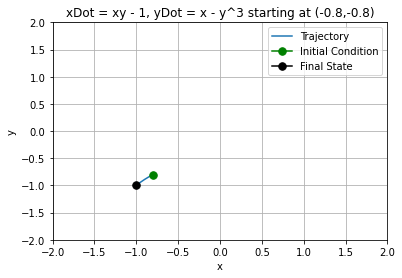

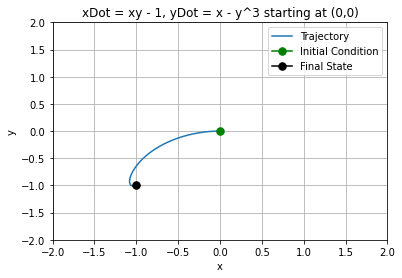

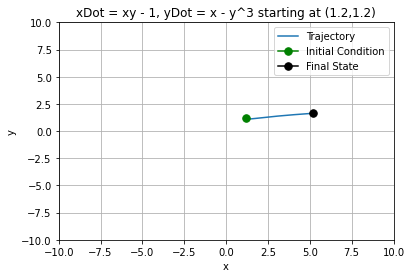

In [82]:
xDot = lambda x,y: x*y - 1
yDot = lambda x,y: x - y**3

plotSystem2DE("xDot = xy - 1", xDot, "yDot = x - y^3", yDot, [-0.8,-0.8],0.02,10000)
plotSystem2DE("xDot = xy - 1", xDot, "yDot = x - y^3", yDot, [0,0],0.02,10000)
plotSystem2DE("xDot = xy - 1", xDot, "yDot = x - y^3", yDot, [1.2,1.2],0.1,2000)

These results look pretty close to what we might expect: two of the plots with initial conditions pretty close to $(-1,-1)$ eventually converge to $(-1,-1)$, which makes sense since that is a stable fixed point of the system, and the one plot with an initial condition very close to $(1,1)$ starts diverging and getting as far away from $(1,1)$ as it can.

On to the next system:

$$ \dot x = x^2 - xy\\
\dot y = 2xy - y^2$$

The nullclines of the system:
$$ \dot x = x^2 - xy = 0 \implies x^2 = xy \implies y = x$$

as well as the vertical line $x = 0$, and
$$ \dot y = 2xy - y^2 = 0 \implies 2xy = y^2  \implies y = 2x$$

as well as the horizontal line $y = 0$. 

So, let's plot these and obtain their intersection, which I anticipate will probably be $(0,0)$.

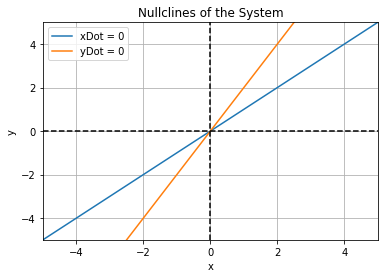

In [110]:
xNull = lambda x: x
yNull = lambda x: 2*x
xValsPlotted = 0.01*np.arange(1000)-5

nullX = [xNull(x) for x in xValsPlotted]
nullFigX = plt.plot(xValsPlotted,nullX,label=xLabel)

nullY = [yNull(x) for x in xValsPlotted]
nullFigY = plt.plot(xValsPlotted,nullY,label=yLabel)

plt.plot(np.zeros(np.arange(1000).size),np.linspace(-5,5,1000),color='black',linestyle='dashed')
plt.plot(np.linspace(-5,5,1000),np.zeros(np.arange(1000).size),color='black',linestyle='dashed')
origin = plt.plot(np.zeros(np.arange(1000).size),np.zeros(np.arange(1000).size),color="black")

plt.title("Nullclines of the System")

plt.xlabel("x")
plt.ylabel("y")
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.grid(True)
plt.legend()
plt.show()

The nullclines intersect at $(0,0)$, so the system's singular fixed point lay there. Let's analyze its stability.

The Jacobian Matrix for this system is
$$\begin{bmatrix}
    \frac{\partial f}{\partial x}(x,y) & \frac{\partial f}{\partial y}(x,y)\\
    \frac{\partial g}{\partial x}(x,y) & \frac{\partial g}{\partial y}(x,y)
  \end{bmatrix} =
  \begin{bmatrix}
    2x-y & -x\\
    2y & 2x-2y
  \end{bmatrix}
$$

Therefore, the Jacobian at $(0,0)$ is

$$\begin{bmatrix}
    2x-y & -x\\
    2y & 2x-2y
  \end{bmatrix}=
  \begin{bmatrix}
    0 & 0\\
    0 & 0
  \end{bmatrix}
$$

Therefore, the eigenvalues of this Jacobian are $\lambda = 0$, so Linear Stability Analysis doesn't tell us anything about the stability of the fixed point. Let's plot a couple samples to determine the stability of the fixed point.

One can see that, for $(x,y)$ in the 4th quadrant, $x$ and $\dot x$ are positive, and $y$ and $\dot y$ are negative so it is likely that the system will stay in the 4th quadrant forever and diverge. One can see that, for $(x,y)$ in the 2nd quadrant, $x < 0$ and $\dot x$ is positive, and $y$ and $\dot y$ are negative so it is likely that the system will move toward $(0,0)$ and perhaps converge over time. The behavior of points in the 1st and 3rd quadrants will be very interesting.

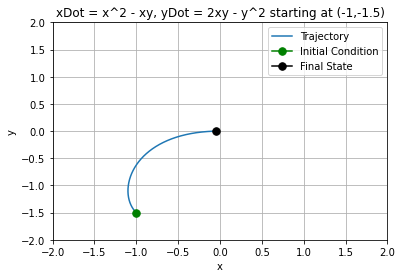

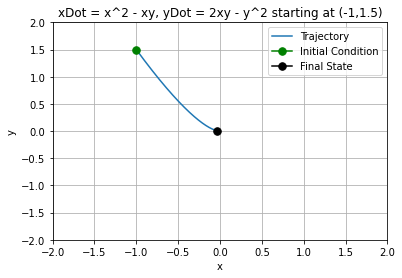

C:\Users\Cameron\AppData\Local\Temp\ipykernel_5248\4036866260.py:1: RuntimeWarning: overflow encountered in double_scalars
  xDot = lambda x,y: x*x - x*y
C:\Users\Cameron\AppData\Local\Temp\ipykernel_5248\4036866260.py:2: RuntimeWarning: overflow encountered in double_scalars
  yDot = lambda x,y: 2*x*y - y**2


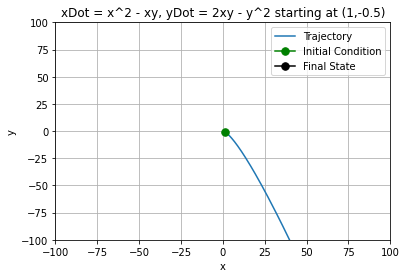

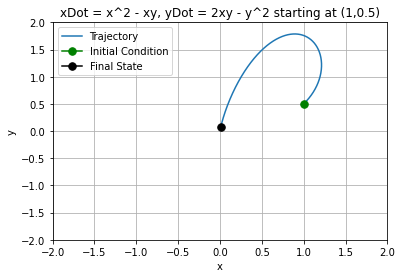

In [96]:
xDot = lambda x,y: x*x - x*y
yDot = lambda x,y: 2*x*y - y**2

plotSystem2DE("xDot = x^2 - xy", xDot, "yDot = 2xy - y^2", yDot, [-1,-1.5],0.02,20000)
plotSystem2DE("xDot = x^2 - xy", xDot, "yDot = 2xy - y^2", yDot, [-1,1.5],0.02,20000)
plotSystem2DE("xDot = x^2 - xy", xDot, "yDot = 2xy - y^2", yDot, [1,-0.5],1)
plotSystem2DE("xDot = x^2 - xy", xDot, "yDot = 2xy - y^2", yDot, [1,0.5],0.02,20000)

So, it would appear that the original intuition for the 2nd and 4th quadrants was correct. I wasn't entirely sure what would happen to trajectories in the 1st and 3rd quadrants, but the nullclines at $x = 0$ and $y = 0$ seem like they play a huge role in helping the trajectories eventually converge to $(0,0)$.

Thus, it would seem that $(0,0)$ is a saddle point.

Onto the final system:
$$ \dot x = y + y^2\\
\dot y = -(1/2)x + (1/5)y - xy + (6/5)y^2$$

The nullclines:
$$\dot x = 0 \implies y + y^2 = 0 \implies y(1 + y) = 0 \implies y = 0, y = -1$$
$$\dot y = 0 \implies -\frac{1}{2}x + \frac{1}{5}y - xy + \frac{6}{5}y^2 = 0 \implies \frac{1}{5}y + \frac{6}{5}y^2 = \frac{1}{2}x + xy\\
\implies x(\frac{1}{2} + y) = \frac{1}{5}y + \frac{6}{5}y^2 \implies x = \frac{\frac{1}{5}y + \frac{6}{5}y^2}{\frac{1}{2} + y}$$



When $y = 0$, then $x = 0$ provides a valid solution to $\dot y = 0$, so $(0,0)$ is also part of the nullcline of $y$. Furthermore, when $y = 0$, $\dot x = 0$, so $(0,0)$ is a fixed point of the system. We can plot the nullclines to examine all the possible fixed points of the system.

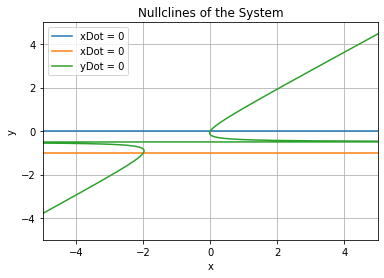

In [107]:
xLabel = "xDot = 0"
yLabel = "yDot = 0"

nullFigX_0 = plt.plot(np.linspace(-5,5,1000),np.zeros(np.arange(1000).size),label=xLabel)
nullFigX_Neg1 = plt.plot(np.linspace(-5,5,1000),-np.ones(np.arange(1000).size),label=xLabel)

yNull = lambda y: ((1/5)*y + (6/5)*y*y)/((1/2)+y)
yVals = 0.01*np.arange(1000) - 5
yValsPlotted = yVals[np.where(yVals!=(-1/2))]

nullY = [yNull(x) for x in yValsPlotted]
nullFigY = plt.plot(nullY,yValsPlotted,label=yLabel)

plt.title("Nullclines of the System")

plt.xlabel("x")
plt.ylabel("y")
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.grid(True)
plt.legend()
plt.show()

It seems like the nullclines of the system intersect at $(-2,-1)$ and $(0,0)$, so these are our fixed points, which can be validated by quickly plugging these into the equations above.

Now for a stability analysis.

The Jacobian Matrix for this system is
$$\begin{bmatrix}
    \frac{\partial f}{\partial x}(x,y) & \frac{\partial f}{\partial y}(x,y)\\
    \frac{\partial g}{\partial x}(x,y) & \frac{\partial g}{\partial y}(x,y)
  \end{bmatrix} =
  \begin{bmatrix}
    0 & 1 + 2y\\
    -\frac{1}{2} - y & \frac{1}{5} - x + \frac{12}{5}y
  \end{bmatrix}
$$

Therefore, the Jacobian at $(0,0)$ is

$$\begin{bmatrix}
    0 & 1 + 2y\\
    -\frac{1}{2} - y & \frac{1}{5} - x + \frac{12}{5}y
  \end{bmatrix} =
  \begin{bmatrix}
    0 & 1\\
    -\frac{1}{2} & \frac{1}{5}
  \end{bmatrix}
$$

Also, the Jacobian at $(-2,-1)$ is

$$\begin{bmatrix}
    0 & 1 + 2y\\
    -\frac{1}{2} - y & \frac{1}{5} - x + \frac{12}{5}y
  \end{bmatrix} =
  \begin{bmatrix}
    0 & -1\\
    \frac{1}{2} & -\frac{1}{5}
  \end{bmatrix}
$$

Now, to obtain the eigenvectors and eigenvalues.


In [120]:
J = lambda x,y: np.array([[0,1+2*y],[(-1/2)-y,(1/5)-x+(12/5)*y]])

eigenStuff00 = np.linalg.eig(J(0,0))
eigenvalues00 = eigenStuff00[0]
eigenvectors00 = eigenStuff00[1]

eigenStuffNeg21 = np.linalg.eig(J(-2,-1))
eigenvaluesNeg21 = eigenStuffNeg21[0]
eigenvectorsNeg21 = eigenStuffNeg21[1]

print("Eigenvalues of Jacobian at (0,0): {},{}\n".format(eigenvalues00[0],eigenvalues00[1]))
print("Eigenvectors of Jacobian at (0,0):\n({},{})\n({},{})\n".format(eigenvectors00[0,0],eigenvectors00[1,0],eigenvectors00[0,1],eigenvectors00[1,1]))

print("Eigenvalues of Jacobian at (-2,-1): {},{}\n".format(eigenvaluesNeg21[0],eigenvaluesNeg21[1]))
print("Eigenvectors of Jacobian at (-2,-1):\n({},{})\n({},{})\n".format(eigenvectorsNeg21[0,0],eigenvectorsNeg21[1,0],eigenvectorsNeg21[0,1],eigenvectorsNeg21[1,1]))


Eigenvalues of Jacobian at (0,0): (0.09999999999999999+0.6999999999999998j),(0.09999999999999999-0.6999999999999998j)

Eigenvectors of Jacobian at (0,0):
((0.8164965809277263+0j),(0.08164965809277266+0.5715476066494083j))
((0.8164965809277263-0j),(0.08164965809277266-0.5715476066494083j))

Eigenvalues of Jacobian at (-2,-1): (-0.09999999999999987+0.7j),(-0.09999999999999987-0.7j)

Eigenvectors of Jacobian at (-2,-1):
((0.816496580927726+0j),(0.0816496580927725-0.5715476066494083j))
((0.816496580927726-0j),(0.0816496580927725+0.5715476066494083j))



Houston, we have complex eigenvalues.

Since none of these eigenvalues have zero real part, I wouldn't expect that the system will exhibit a limit cycle: instead, the system will spiral away from $(0,0)$ and spiral into $(-2,-1)$. I'll put that to the test now.

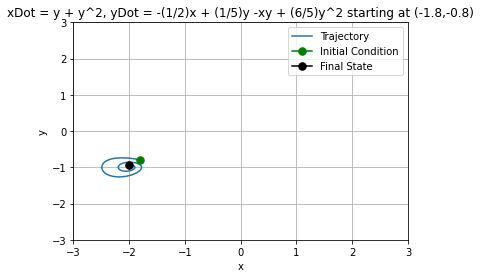

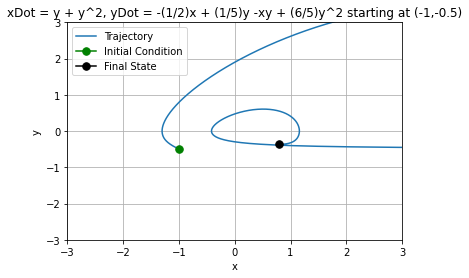

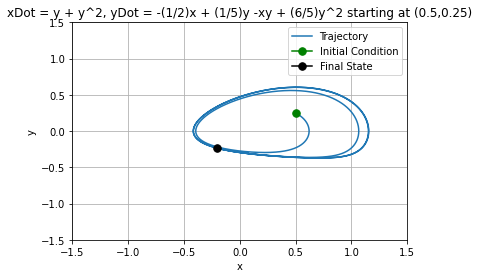

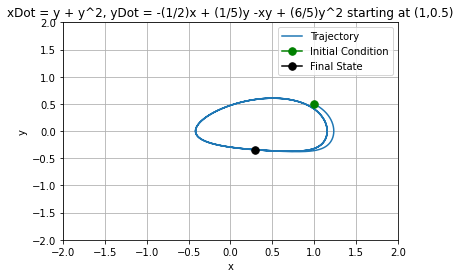

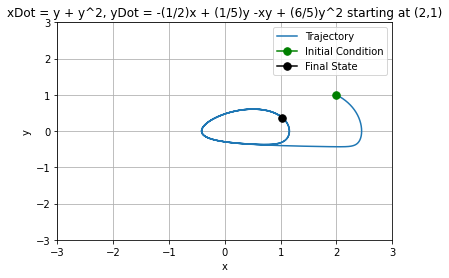

In [135]:
xDot = lambda x,y: y + y*y
yDot = lambda x,y: -(1/2)*x + (1/5)*y -x*y + (6/5)*y**2

plotSystem2DE("xDot = y + y^2", xDot, "yDot = -(1/2)x + (1/5)y -xy + (6/5)y^2", yDot, [-1.8,-0.8],0.03,20000)
plotSystem2DE("xDot = y + y^2", xDot, "yDot = -(1/2)x + (1/5)y -xy + (6/5)y^2", yDot, [-1,-0.5],0.03,40000)
plotSystem2DE("xDot = y + y^2", xDot, "yDot = -(1/2)x + (1/5)y -xy + (6/5)y^2", yDot, [0.5,0.25],0.015,40000)
plotSystem2DE("xDot = y + y^2", xDot, "yDot = -(1/2)x + (1/5)y -xy + (6/5)y^2", yDot, [1,0.5],0.02,40000)
plotSystem2DE("xDot = y + y^2", xDot, "yDot = -(1/2)x + (1/5)y -xy + (6/5)y^2", yDot, [2,1],0.03,40000)

To be honest, I'm a bit confused by what I'm seeing. It definitely seems like the fixed point at $(-2,-1)$ induces nearby points to spiral into it, but the fixed point at $(0,0)$, which was supposed to induce divergent spirals away from it, does not seem to be doing that. Indeed, in some cases, it seems like some points are stabilized into a cycle-like, asymmetric orbit by $(0,0)$. I'm not entirely sure how to classify what's in front of me.

Question 2: The (In?)Famous Double Pendulum



In [139]:
'''
Double Pendulum Governing Equations

Input: x -- system variables
       p -- parameters

x = [a1; a2; p1; p2]
    a1, a2:  angles of the two pendula
    p1, p2:  canonical momentum coordinates

p = [m1, m2, l1, l2, g]
    m1, m2:  masses of the two pendula
    l1, l2:  lengths of the two pendula
    g:       acceleration due to gravity

Output: dxdt -- vector of derivatives of each of the state variables

If you want to plot this in space, spatial coordinates are given by
x1 = l1.*sin(a1);
y1 = -l1.*cos(a1);
x2 = l1.*sin(a1) + l2.*sin(a2);
y2 = -l1.*cos(a1)-l2.*cos(a2);
'''


def double_pendulum_governing_equations(state,parameters):

    #state variables (canonical position and momentum coordinates)
    a1 = x[0]
    a2 = x[1]
    p1 = x[2]
    p2 = x[3]

    #read in parameters
    m1=pars[0]
    m2=pars[1]
    l1=pars[2]
    l2=pars[3]
    g=pars[4]
    
    #some useful constants
    C1 = p1*p2*np.sin(a1-a2)/(l1*l2*(m1+m2*(np.sin(a1-a2)**2)))
    
    C2 = np.sin(2*(a1-a2))*(p1*p1*m2*l2*l2-2*p1*p2*m2*l1*l2*np.cos(a1-a2) + p2*p2*(m1+m2)*l1*l1)/(2*l1*l1*l2*l2*(m1+m2*(np.sin(a1-a2))**2)**2)
    
    #the derivatives
    a1dot = (p1*l2-p2*l1*np.cos(a1-a2))/(l1*l1*l2*(m1+m2*(np.sin(a1-a2)**2)))
    
    a2dot = (p2*(m1+m2)*l1-p1*m2*l2*np.cos(a1-a2))/(m2*l1*l2*l2*(m1+m2*(np.sin(a1-a2)**2)))
    
    p1dot = -(m1+m2)*g*l1*np.sin(a1)-C1+C2
    
    p2dot = -m2*g*l2*np.sin(a2)+C1-C2
    
    #end readout
    
    stateDeriv = [a1dot, a2dot, p1dot, p2dot]
    return stateDeriv

In [ ]:
def EulersMethod(t_n,tPrev,y,fPrime):
    systemDerivative = fPrime(*y)
    #print(systemDerivative)
    diff = systemDerivative*(t_n-tPrev)
    if(len(diff)<len(y)):
        y = y.pop()
    yNew = y + diff
    return yNew